In [1]:
import time
import sys
import os

# 현재 파일(main.ipynb)이 있는 디렉토리의 부모 디렉토리를 sys.path에 추가
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

In [2]:
# INFO 
from gameInfo import *
from hyperParams import *
from setDevice import *

# CODES
from state.ver1 import *
from network.resnet import *
from trainer.ver1 import *
from eval.ver1 import *
from selfplay.ver1 import *
from tester.nnVsHuman import *

In [3]:
model = Network(N_RESIDUAL_BLOCK, N_KERNEL, STATE_SHAPE, N_ACTIONS)
params = torch.load("/Users/ijimin/Documents/GitHub/AiGO/Omok/Jimin/model/Jpub/best_model_weight.pth", weights_only=False)
model.load_state_dict(params)

<All keys matched successfully>

,0,1,2
0,,,
1,,,
2,,,


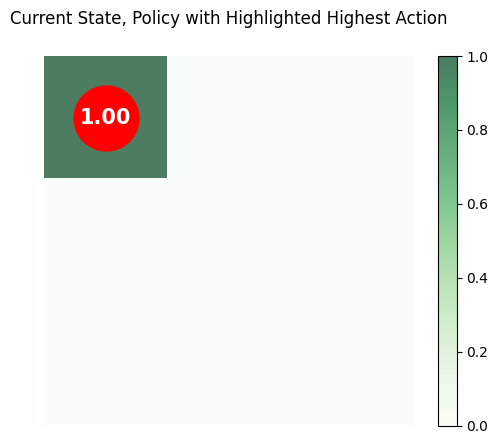

Alpha Zero's Action is : 0


,0,1,2
0,O,,
1,,,
2,,,


,0,1,2
0,O,,
1,,X,
2,,,


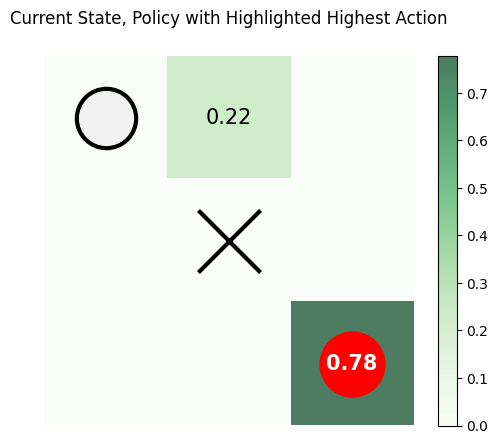

Alpha Zero's Action is : 8


,0,1,2
0,O,,
1,,X,
2,,,O


,0,1,2
0,O,,
1,X,X,
2,,,O


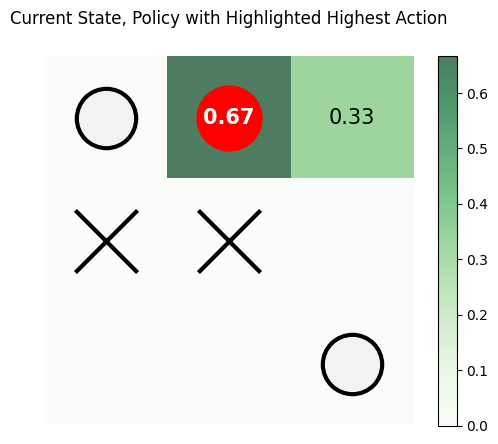

Alpha Zero's Action is : 2


,0,1,2
0,O,,O
1,X,X,
2,,,O


,0,1,2
0,O,,
1,X,X,
2,,,O


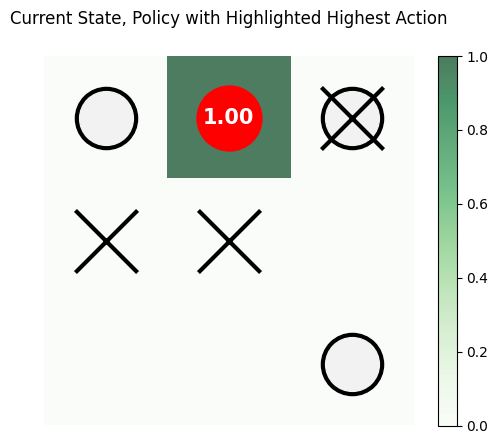

Alpha Zero's Action is : 1


,0,1,2
0,O,O,
1,X,X,
2,,,O


ValueError: invalid literal for int() with base 10: ''

In [8]:
# vs_human = ModelvsHuman(eval_network.best_model)

vs_human = ModelvsHuman(model)
vs_human()

In [9]:
from MCTS.ver1 import *

In [16]:
history = []
state = State()
mcts = MCTS(100)

print(state.is_done())
while True:
    if state.is_done():
        break
    
    learned_policy = np.zeros([state.n_actions])
    legal_policy = mcts.get_legal_policy(state, model, 1.0)
    learned_policy[state.legal_actions] = legal_policy
    history.append([state.board, learned_policy, None])

    print(" ")
    print(state.board)
    print(learned_policy)

    action = np.random.choice(state.legal_actions, p=legal_policy)

    state = state.next(action)

False
 
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]
[1. 0. 0. 0. 0. 0. 0. 0. 0.]
 
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[1. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]]
[0.         0.01010101 0.01010101 0.01010101 0.01010101 0.01010101
 0.01010101 0.92929293 0.01010101]
 
[[[1. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 1. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]
[0.         0.02020202 0.         0.         0.97979798 0.
 0.         0.         0.        ]
 
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 1. 0.]]

 [[1. 0. 0.]
  [0. 1. 0.]
  [0. 0. 0.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]]
[0.         0.01010101 0.01010101 0.01010101 0.         0.01010101
 0.94949495 0.         0.01010101]
 
[[[1. 0. 0.]
  [0. 1. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [1. 1. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]
[0.         0.02020202 0.         0.      

In [36]:
i = 2

p, v = model(torch.tensor(history[4][0], dtype=torch.float32).reshape(1, 3, 3, 3))
print(np.round(p.detach().numpy().reshape((3,3)), 3))
print(v)

[[0.003 0.001 0.001]
 [0.    0.02  0.   ]
 [0.001 0.    0.974]]
tensor([[1.0000]], grad_fn=<TanhBackward0>)
